In [98]:
import numpy as np
from scipy.fftpack import fft
import matplotlib.pyplot as plt
from scipy import signal
from scipy.integrate import quad

In [99]:
def rectangular_signal(t):
    t_f = np.floor(t)
    if t_f % 2 == 0:
        return 2
    else:
        return 0

def print_1_2(t, t_kernal, kernel, signal, convolved_signal, title):
    plt.figure(figsize=(12, 6))
    plt.subplot(3, 1, 1)
    plt.title(title)
    plt.plot(t_kernal, kernel, label='Ядро')
    plt.title('Ядро')
    plt.subplot(3, 1, 2)
    plt.title('Сигнал')
    plt.plot(t, signal, label='Сигнал')
    plt.subplot(3, 1, 3)
    plt.plot(t, convolved_signal, label='Результат свертки')
    plt.title('Свертка с ядром')
    plt.tight_layout()
    plt.show()

def print_1_2_2(t, t_kernal, kernel, signal, convolved_signal, title, tt):
    plt.figure(figsize=(12, 6))
    plt.subplot(3, 1, 1)
    plt.title(title)
    plt.plot(t_kernal, kernel, label='Ядро')
    plt.title('Ядро')
    plt.subplot(3, 1, 2)
    plt.title('Сигнал')
    plt.plot(t, signal, label='Сигнал')
    plt.subplot(3, 1, 3)
    plt.plot(t, convolved_signal, label='Результат свертки')
    plt.plot(t, tt, label='Результат свертки')
    plt.title('Свертка с ядром')
    plt.tight_layout()
    plt.show()

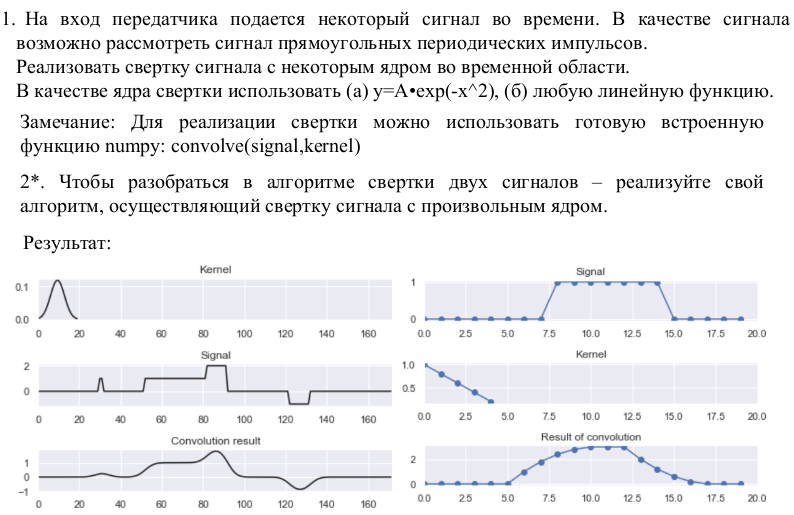

# 1

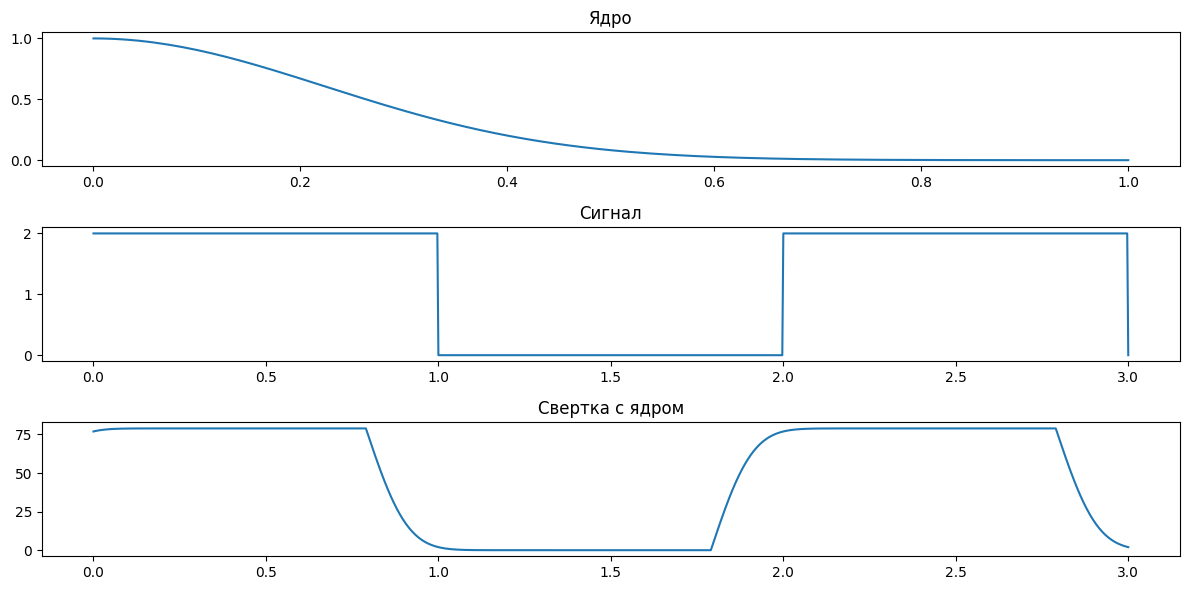

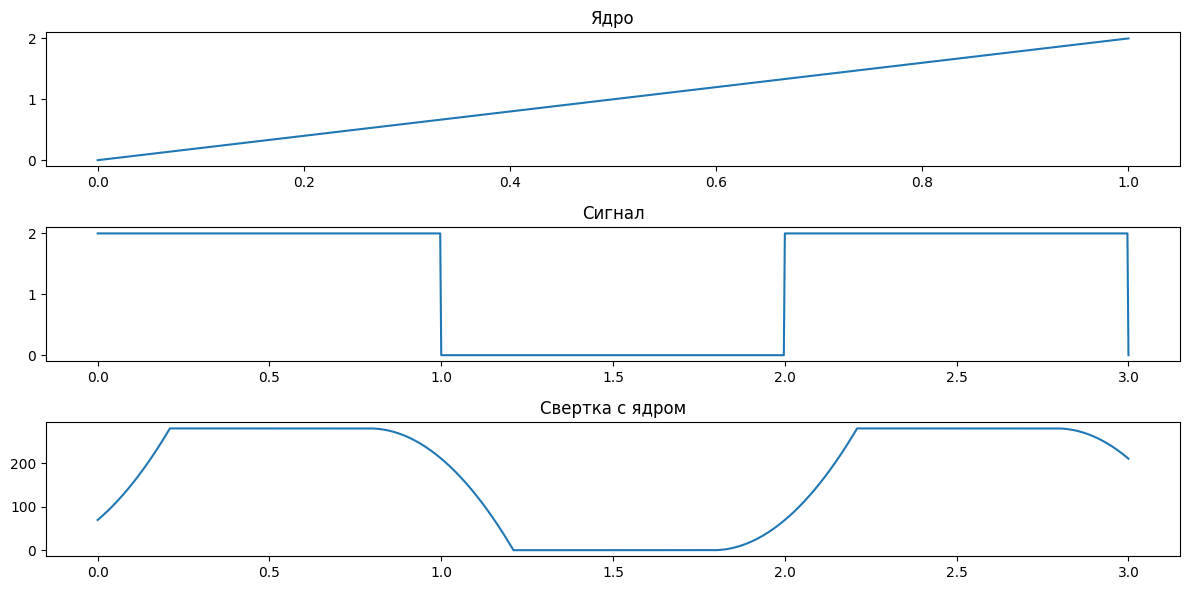

In [100]:
t = np.linspace(0, 3, 1000)
t_kernal = np.linspace(0, 1, 140)

# прямоугольные периодические импульсы
signal = np.array([rectangular_signal(x) for x in t])

# Ядро свертки Прямоугольник
A = 2
# kernel_a = A*np.exp(-np.power(t_kernal, 2)/0.1)
def kernel_exp(x, A):
    return A*np.exp(-np.power(x, 2)/0.1)
kernel_a = kernel_exp(t_kernal, 1)

# Ядро свертки - линейная функция
kernel_b = 2 * t_kernal

# Выполняем свертку
convolved_signal_a = np.convolve(signal, kernel_a, mode='same')
convolved_signal_b = np.convolve(signal, kernel_b, mode='same')

# Нарисуем графики
print_1_2(t, t_kernal, kernel_a, signal, convolved_signal_a, "Прямоугольные периодические импульсы")
print_1_2(t, t_kernal, kernel_b, signal, convolved_signal_b, "Линейный сигнал")

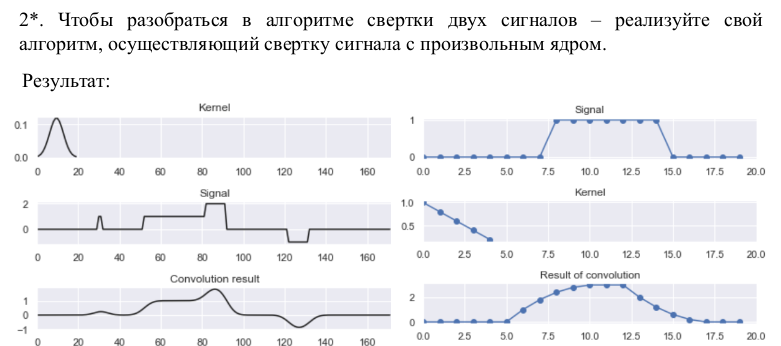

# 2

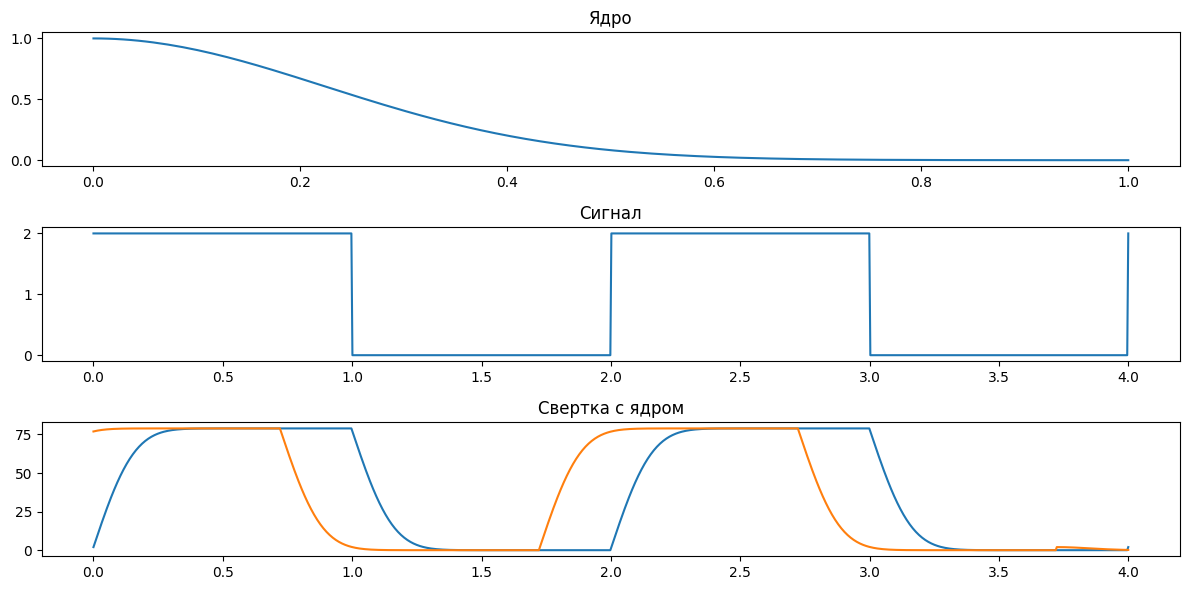

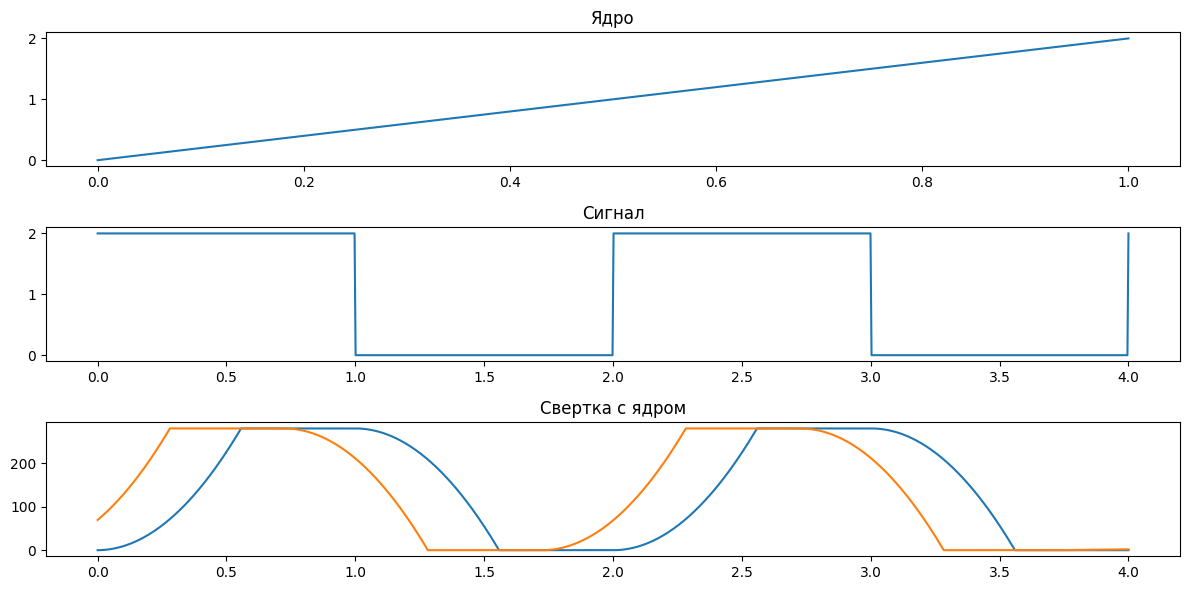

In [101]:
def my_convolve(signal, kernel):
    signal_length = len(signal)
    kernel_length = len(kernel)
    convolved_signal = np.zeros(signal_length)

    for i in range(signal_length):
        for j in range(kernel_length):
            if i - j >= 0:
                convolved_signal[i] += signal[i - j] * kernel[j]

    return convolved_signal

t = np.linspace(0, 4, 1000)
t_kernal = np.linspace(0, 1, 140)

# прямоугольные периодические импульсы
signal = np.array([rectangular_signal(x) for x in t])

# Ядро свертки Прямоугольник
A = 2
def kernel_exp(x, A):
    return A*np.exp(-np.power(x, 2)/0.1)
kernel_a = kernel_exp(t_kernal, 1)

# Ядро свертки - линейная функция
kernel_b = 2 * t_kernal


# Выполняем свертку
convolved_signal_a = my_convolve(signal, kernel_a)
convolved_signal_a_2 = np.convolve(signal, kernel_a, mode='same')

convolved_signal_b = my_convolve(signal, kernel_b)
convolved_signal_b_2 = np.convolve(signal, kernel_b, mode='same')

# Нарисуем графики
print_1_2_2(t, t_kernal, kernel_a, signal, convolved_signal_a, "Прямоугольные периодические импульсы", convolved_signal_a_2)
print_1_2_2(t, t_kernal, kernel_b, signal, convolved_signal_b, "Линейный сигнал", convolved_signal_b_2)

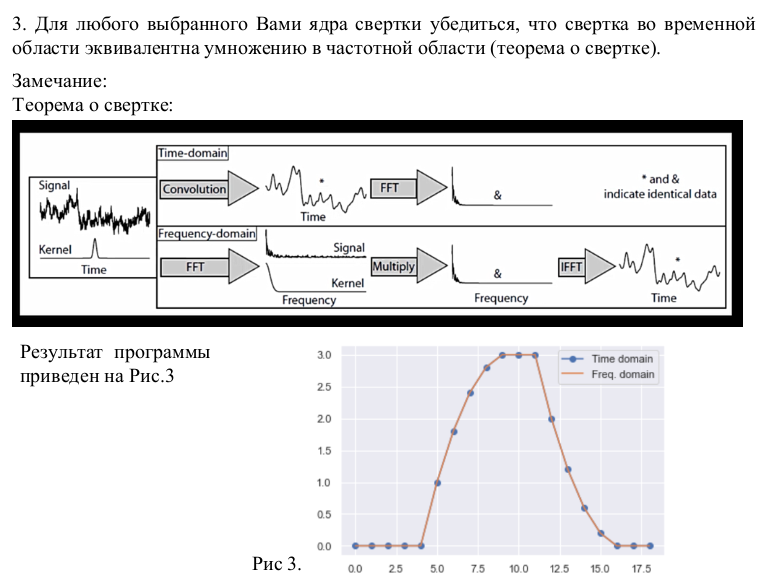

In [102]:
def fft_full(xs, ys, normalize=False):
    spectrum = np.fft.fft(ys)
    if normalize: normalize(spectrum)
    freq_series = np.fft.fftfreq(len(xs), 1/len(xs))
    return [freq_series, (spectrum)]

samples_rate = 1000

t = np.linspace(0, 4, 1000)
signal = np.array([rectangular_signal(x) for x in t])

kernel_t = np.linspace(0, 1, 200)
kernel_expo_vals = kernel_exp(kernel_t, 1)
kernel_expo_vals = np.pad(kernel_expo_vals, (400, 400))

cos_freqs, cos_spec = fft_full(t, signal) 
kernel_freqs, kernel_spec = fft_full(kernel_t, kernel_expo_vals)

conv_fft = cos_spec * kernel_spec
conv_mlt = np.fft.ifft(conv_fft)

conved_np = np.convolve(signal, kernel_expo_vals, 'same')

spectr_conved_np = np.fft.fft(conved_np)
spectr_conv_mlt = np.fft.fft(conv_mlt)

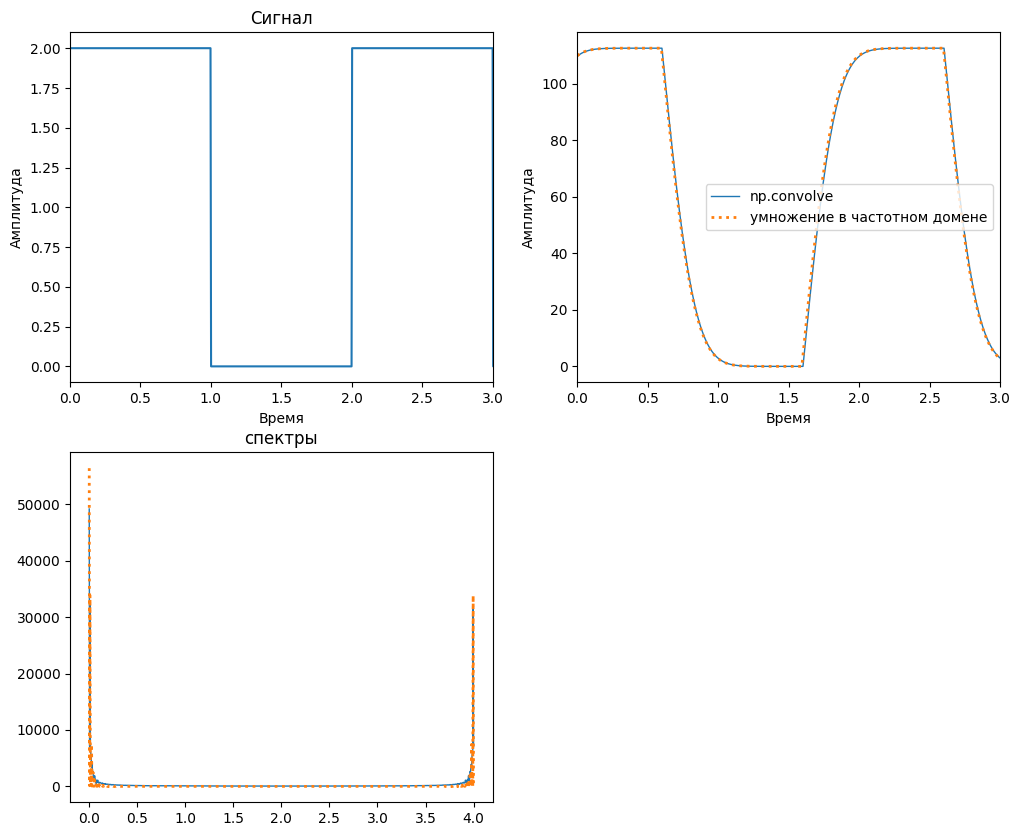

In [103]:
fig = plt.figure(figsize=(12,10))
plt.subplots_adjust(wspace=0.2, hspace=0.2)

plt.subplot(221)
plt.title("Cигнал")
plt.plot(t, signal)
plt.xlabel('Время')
plt.ylabel('Амплитуда')
plt.xlim([0, 3])

plt.subplot(222)
plt.plot(t, conved_np, label='np.convolve', linewidth=1)
plt.plot(t, conv_mlt, label='умножение в частотном домене',  linestyle='dotted', linewidth=2)
plt.xlabel('Время')
plt.ylabel('Амплитуда')
plt.xlabel('Время')
plt.legend()
plt.xlim([0, 3])

plt.subplot(223)
plt.title("спектры")
plt.plot(t, np.abs(spectr_conved_np), label='np.convolve', linewidth=1)
plt.plot(t, np.abs(spectr_conv_mlt), label='умножение в частотном домене',  linestyle='dotted', linewidth=2)

plt.show()

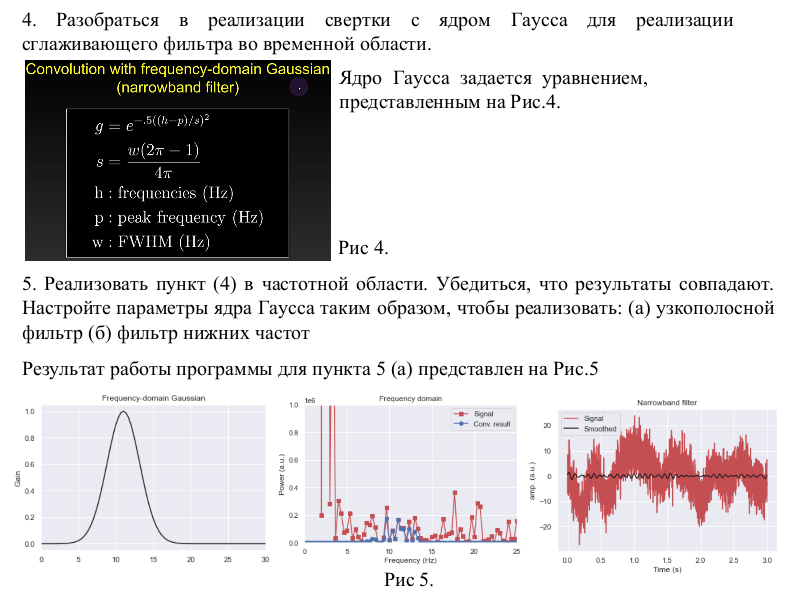

Если спектр после свертки с Гауссовым фильтром становится очень маленьким, это может быть связано с тем, что Гауссово ядро, которое вы используете, может иметь очень низкую амплитуду для высоких частот. Это типичное поведение Гауссового фильтра.

Гауссов фильтр широко используется для размытия изображений или сглаживания сигналов. Он хорошо подавляет высокочастотные компоненты в сигнале. При этом, чем выше частота, тем меньше вклад вносит Гауссово ядро, что может привести к тому, что спектр высокочастотных компонентов становится очень маленьким.

Если вы хотите, чтобы спектр после свертки с Гауссовым фильтром был более схож с исходным спектром, вы можете попробовать увеличить амплитуду Гауссова ядра или уменьшить значение 
�
σ, чтобы сделать его более остроконечным и сохранить больше высокочастотных компонентов. Однако это также может увеличить шум в сигнале.

Изменение параметров Гауссова ядра может помочь достичь желаемого баланса между размытием и сохранением высокочастотных компонентов в сигнале, в зависимости от ваших конкретных потребностей.

# Ядро Гауса

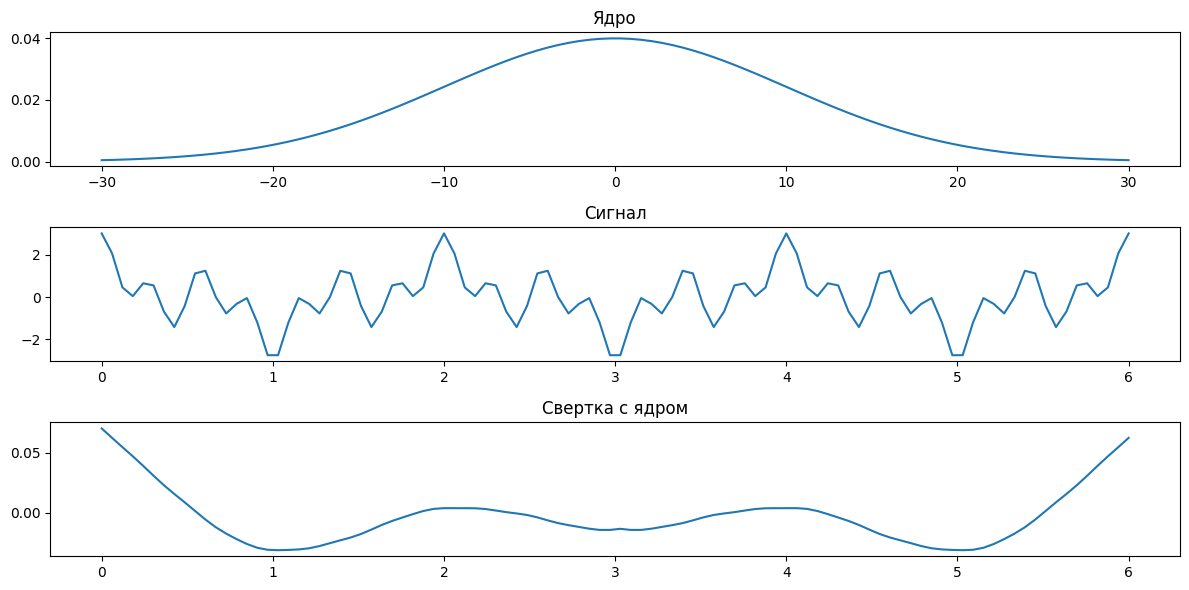

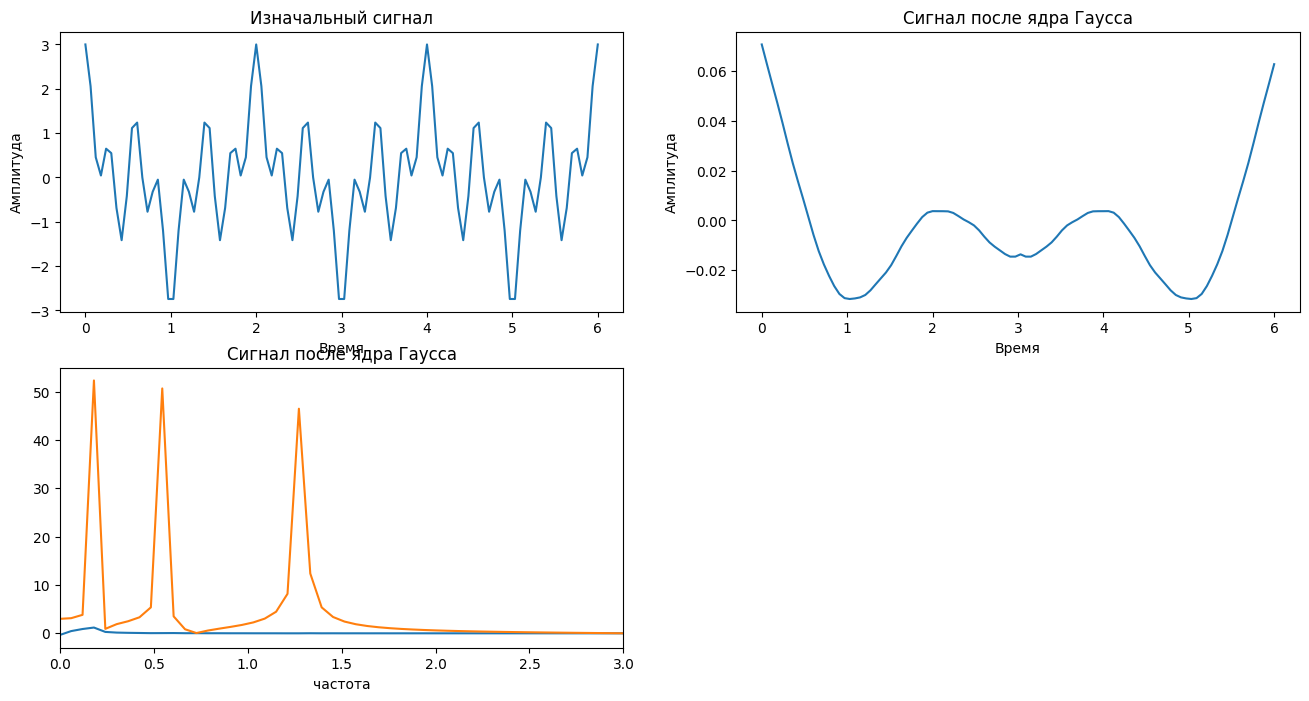

In [104]:
def gaussian_kernel(sigma, size=100):
    x = np.linspace(-3 * sigma, 3 * sigma, size)
    kernel = (1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-(x**2) / (2 * sigma**2))
    return kernel, x

def calculate_cos(w):
  res_w = 2 * np.pi * w 
  cos_func = lambda t: np.cos(res_w * t)
  return cos_func

cos_50f = calculate_cos(50)
cos_150f = calculate_cos(150)
cos_250f = calculate_cos(350)
cos_sum = lambda t: cos_50f(t) + cos_150f(t) + cos_250f(t)

t = np.linspace(0, 6, 100)
signal = np.array([cos_sum(x) for x in t])

gaussian_kernel_vals, t_kernal = gaussian_kernel(10, 100)

gaussed_signal = np.convolve(signal, gaussian_kernel_vals, mode='same')

print_1_2(t, t_kernal, gaussian_kernel_vals, signal, gaussed_signal, "Гаус")

spectrum_cos_sum = np.abs(np.fft.fft(signal))
spectr_gaussed_signal = np.fft.fft(gaussed_signal)

fig = plt.figure(figsize=(16,8))

plt.subplot(221)
plt.title("Изначальный сигнал")
plt.plot(t, signal)
plt.xlabel('Время')
plt.ylabel('Амплитуда')

plt.subplot(222)
plt.title("Сигнал после ядра Гаусса")
plt.plot(t, gaussed_signal)
plt.xlabel('Время')
plt.ylabel('Амплитуда')

plt.subplot(223)
plt.title("Сигнал после ядра Гаусса")
plt.plot(t, spectr_gaussed_signal)
plt.plot(t, spectrum_cos_sum)
plt.xlabel('частота')
plt.xlim([0,3])

plt.show()

# Узкополосный фильтр

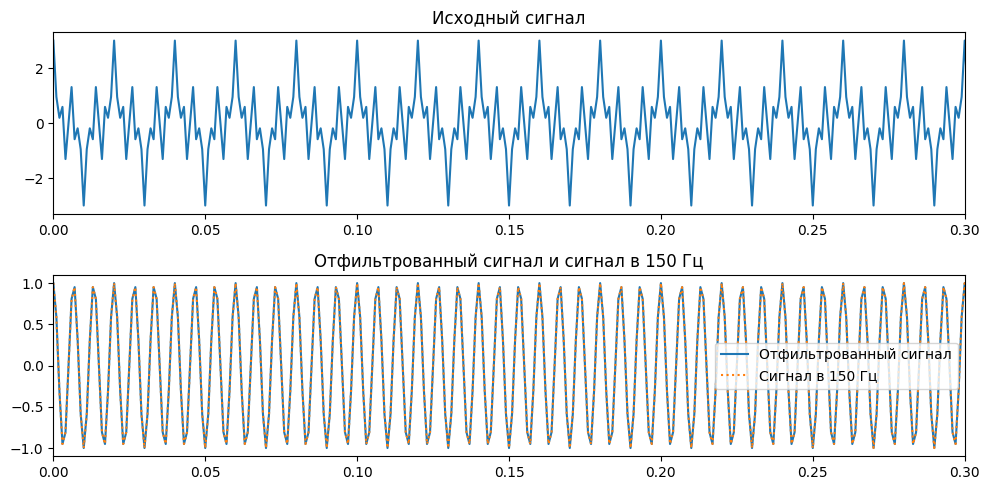

In [113]:
# Функция для создания ядра Гаусса в частотной области
def gaussian_frequency_kernel(frequencies, peak_frequency, FWHM):
    s = (FWHM * (2 * np.pi - 1)) / (4 * np.pi)
    kernel = np.exp(-0.5 * ((frequencies - peak_frequency) / s) ** 2)
    return kernel

# Создайте сигнал (сумма косинусов)
sample_rate = 1000
t = np.arange(0, 1, 1/sample_rate)
signal = np.cos(2 * np.pi * 50 * t) + np.cos(2 * np.pi * 150 * t) + np.cos(2 * np.pi * 350 * t)

# Выполните преобразование Фурье сигнала
signal_spectrum = np.fft.fft(signal*2)

# Определите параметры ядра Гаусса в частотной области
peak_frequency = 150  # Центральная частота
FWHM = 10  # Пример ширины полосы

# Создайте ядро Гаусса в частотной области
frequencies = np.fft.fftfreq(len(signal), 1 / sample_rate)
kernel = gaussian_frequency_kernel(frequencies, peak_frequency, FWHM)

# Примените ядро к спектру сигнала
filtered_spectrum = signal_spectrum * kernel

# Выполните обратное преобразование Фурье для получения отфильтрованного сигнала
filtered_signal = np.fft.ifft(filtered_spectrum)

# Постройте исходный сигнал и отфильтрованный сигнал
plt.figure(figsize=(10, 5))
plt.subplot(2, 1, 1)
plt.plot(t, signal, label='Исходный сигнал')
plt.title('Исходный сигнал')
plt.xlim(0, 0.3)
plt.subplot(2, 1, 2)
plt.plot(t, np.real(filtered_signal), label='Отфильтрованный сигнал')
plt.plot(t, np.cos(2 * np.pi * peak_frequency * t), linestyle='dotted', label='Сигнал в 150 Гц')
plt.title('Отфильтрованный сигнал и сигнал в 150 Гц')
plt.tight_layout()
plt.xlim(0, 0.3)
plt.legend()
plt.show()

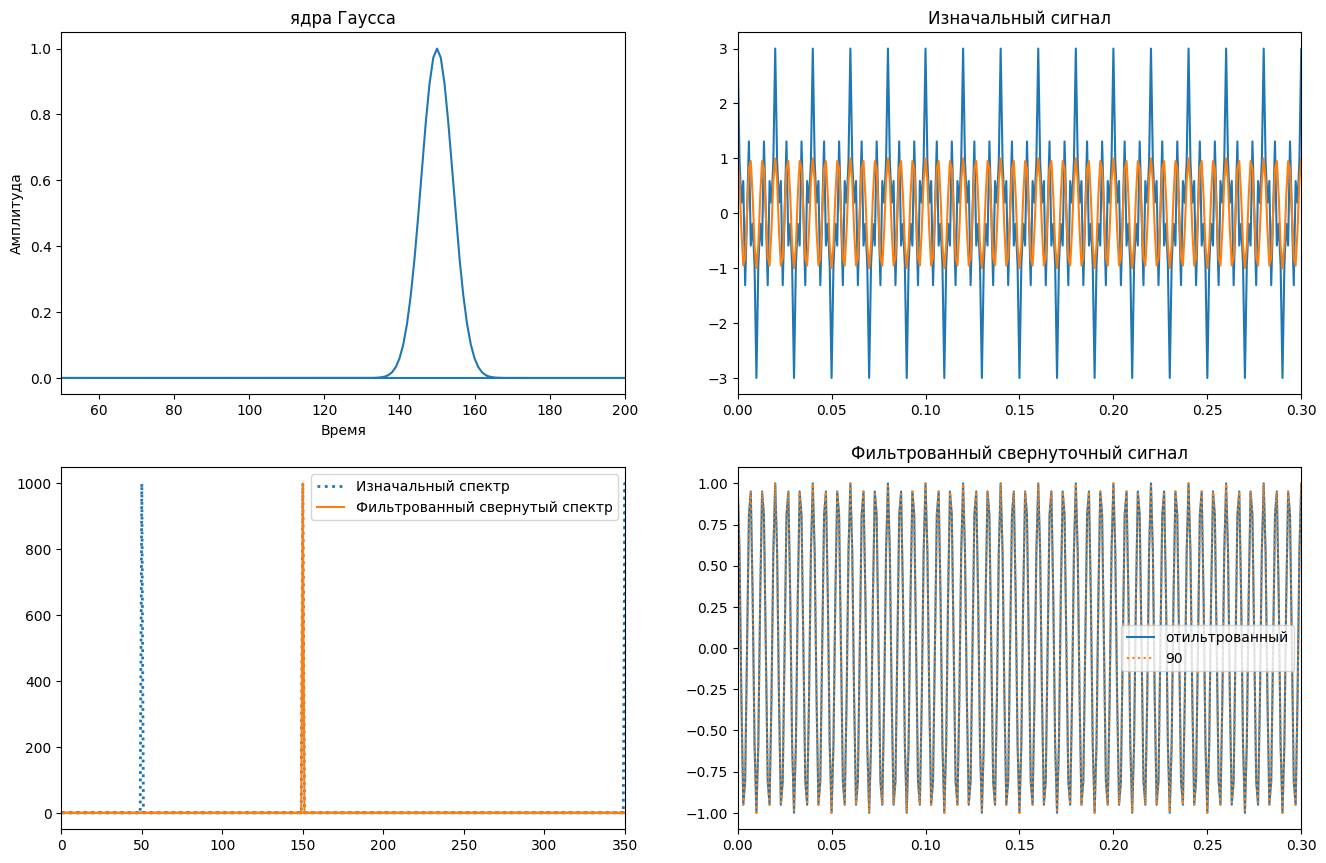

In [120]:
def gaussian_frequency_kernel(frequencies, peak_frequency, FWHM):
    s = (FWHM * (2 * np.pi - 1)) / (4 * np.pi)
    kernel = np.exp(-0.5 * ((frequencies - peak_frequency) / s) ** 2)
    return kernel
signal = np.cos(2 * np.pi * 50 * t) + np.cos(2 * np.pi * 150 * t) + np.cos(2 * np.pi * 350 * t)
# peak_frequency - это частота пика (центр) ядра Гаусса в герцах.
# FWHM (Full Width at Half Maximum) - это полная ширина полосы на уровне половины максимума, которая используется для определения формы и ширины ядра Гаусса.
sample_rate = 1000
peak_frequency = 150
FWHM = 10

# Создаем частотный массив
frequencies = np.fft.fftfreq(len(t), 1.0 / sample_rate)

frequency_kernel = gaussian_frequency_kernel(frequencies, peak_frequency, FWHM)

spectrum_cos_sum = np.abs(np.fft.fft(signal*2))
conved_cos_sum = frequency_kernel * spectrum_cos_sum

cos_90f = calculate_cos(150)
cos_sum_90 = lambda t: cos_90f(t)

# t = np.linspace(0, 6, 100)
signal_90 = np.array([cos_sum_90(x) for x in t])

plt.figure(figsize=(16, 16))

plt.subplot(321)
plt.plot(frequencies, np.abs(frequency_kernel))
plt.title('ядра Гаусса')
plt.xlim([50, 200])
plt.xlabel('Время')
plt.ylabel('Амплитуда')

plt.subplot(322)
plt.title("Изначальный сигнал")
plt.plot(t, signal)
plt.xlim(0, 0.3)
plt.plot(t, np.cos(2 * np.pi * peak_frequency * t), label="90")

plt.subplot(323)
plt.plot(frequencies, np.abs(np.fft.fft(signal*2)), label='Изначальный спектр',  linestyle='dotted', linewidth=2)
plt.plot(frequencies, conved_cos_sum, label='Фильтрованный свернутый спектр')
plt.xlim([0, 350])
plt.legend()

plt.subplot(324)
plt.title("Фильтрованный свернуточный сигнал")
plt.plot(t, np.fft.ifft(conved_cos_sum), label="отильтрованный")
plt.plot(t, np.cos(2 * np.pi * peak_frequency * t), label="90", linestyle='dotted')
plt.legend()
plt.xlim(0, 0.3)

plt.show()

# Фильтр низких частот

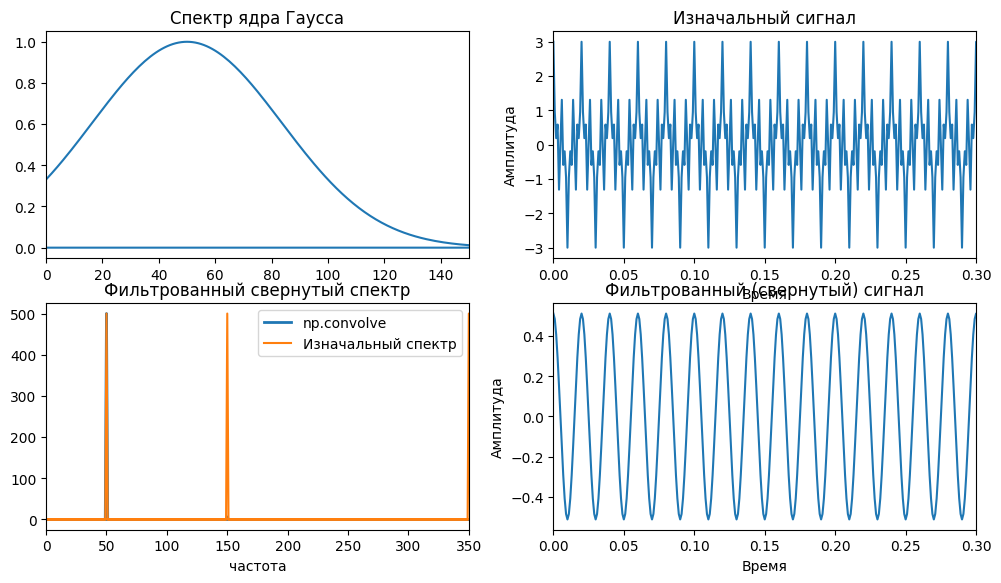

In [124]:
def gaussian_frequency_kernel(frequencies, peak_frequency, FWHM):
    s = (FWHM * (2 * np.pi - 1)) / (4 * np.pi)
    kernel = np.exp(-0.5 * ((frequencies - peak_frequency) / s) ** 2)
    return kernel

sample_rate = 1000
peak_frequency = 50
FWHM = 80

# Создаем частотный массив
frequencies = np.fft.fftfreq(len(t), 1.0 / sample_rate)

frequency_kernel = gaussian_frequency_kernel(frequencies, peak_frequency, FWHM)

spectrum_cos_sum = np.abs(np.fft.fft(signal))
conved_cos_sum = frequency_kernel * spectrum_cos_sum

fig = plt.figure(figsize=(12,10))
plt.subplots_adjust(wspace=0.2, hspace=0.2)

cos_90f = calculate_cos(50)
cos_sum_90 = lambda t: cos_90f(t)

# t = np.linspace(0, 6, 100)
signal_90 = np.array([cos_sum_90(x) for x in t])

plt.subplot(321)
plt.plot(frequencies, np.abs(frequency_kernel))
plt.title('Cпектр ядра Гаусса')
plt.xlim([0, 150])

plt.subplot(322)
plt.title("Изначальный сигнал")
plt.plot(t, signal)
plt.xlabel('Время')
plt.ylabel('Амплитуда')
plt.xlim(0, 0.3)

plt.subplot(323)
plt.title("Фильтрованный свернутый спектр")
plt.plot(frequencies, conved_cos_sum, label='np.convolve', linewidth=2)
plt.plot(frequencies, np.abs(np.fft.fft(signal)), label='Изначальный спектр')
plt.xlim([0, 350])
plt.xlabel('частота')
plt.legend()

plt.subplot(324)
plt.title("Фильтрованный (свернутый) сигнал")
plt.plot(t, np.fft.ifft(conved_cos_sum))
plt.xlabel('Время')
plt.ylabel('Амплитуда')
plt.xlim(0, 0.3)

plt.show()

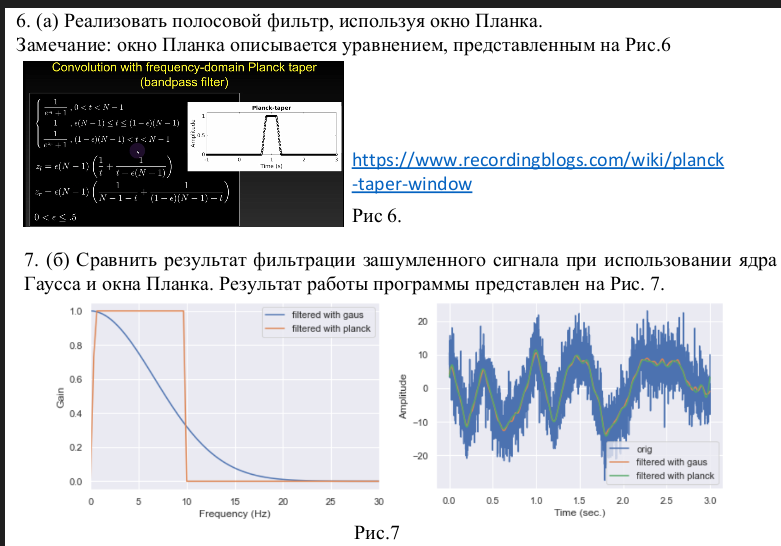

# Планка

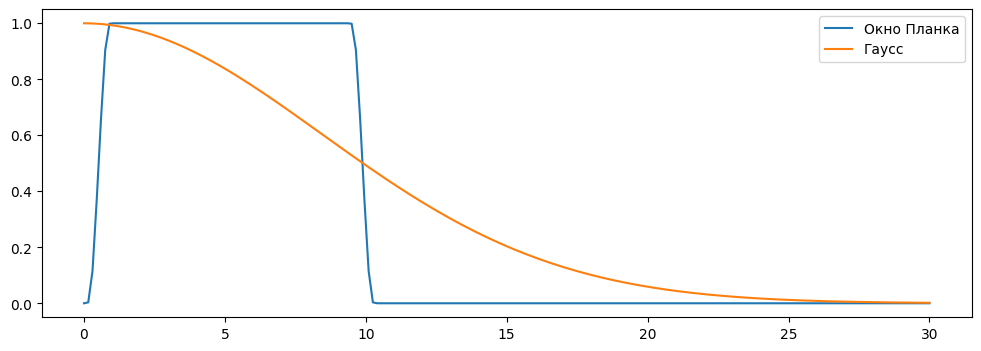

In [18]:
def get_param_function_plank(k, eps, N):
    za = lambda k, eps, N: eps * (N - 1) * (1 / k + 1 / (k - eps * (N - 1)))
    zb = lambda k, eps, N: eps * (N - 1) * (1 / (N - 1 - k) + 1 / (-k + (1 - eps) * (N - 1)))

    if k == 0 or k == N - 1:     return 0
    if k < eps * (N - 1):        return 1 / (np.exp(za(k, eps, N)) + 1)
    if k <= (1 - eps) * (N - 1): return 1
    if k < N - 1:                return 1 / (np.exp(zb(k, eps, N)) + 1)
    return 0

def window_plank(eps, fwhm, m_len=200):
    plank = [get_param_function_plank(k, eps, fwhm) for k in range(fwhm)]
    return np.pad(plank, (0, m_len-len(plank)))

planka = window_plank(0.1,70)
frequencies = np.linspace(0, 30, 200)
peak_frequency = 0
FWHM = 20 
gaus_freqs = gaussian_frequency_kernel(frequencies, peak_frequency, FWHM)

fig = plt.figure(figsize=(12,4))
plt.plot(frequencies, planka, label="Окно Планка")
plt.plot(frequencies, gaus_freqs, label="Гаусс")
plt.legend()
plt.show()

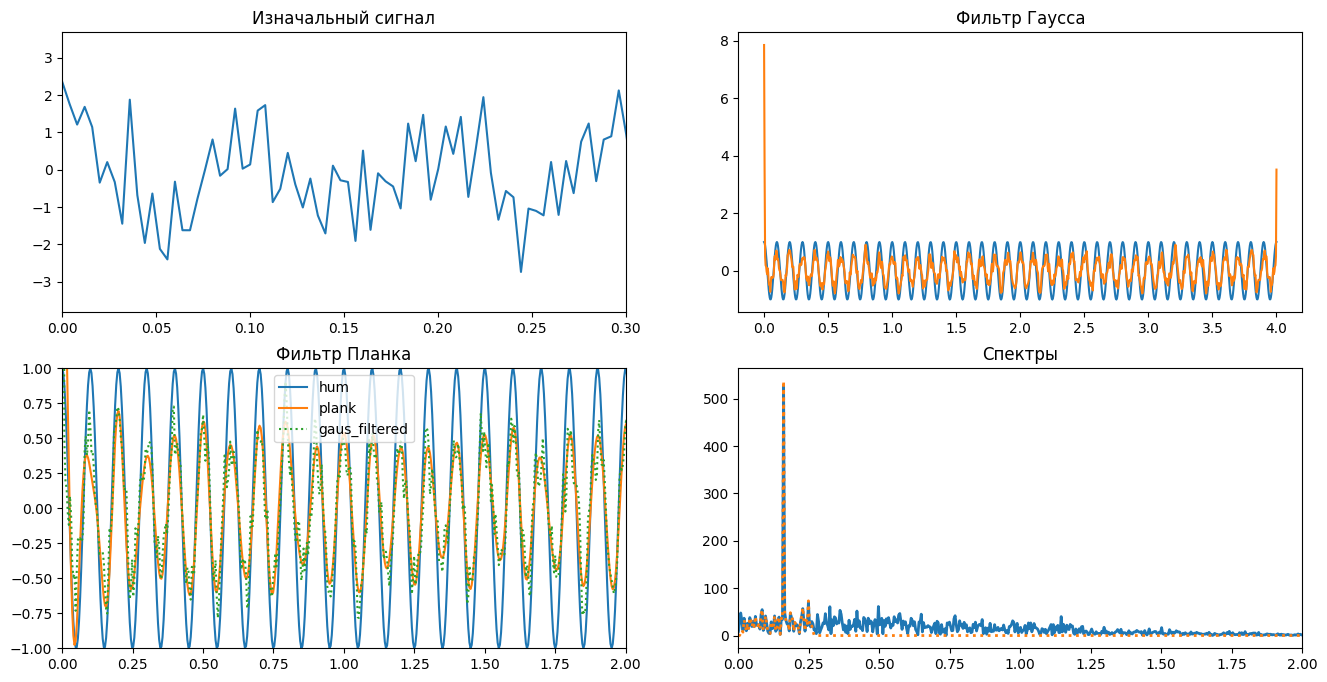

In [132]:
def cosinus_signal_func(freq = None, init_phase = 0):
    w = 2 * np.pi * freq
    cos_func = lambda t: np.cos(t * w + init_phase)

    return cos_func

def calc_signal(s_func, t_start = 0, t_end = None, steps_cnt = None, noised=False):
    if t_end is None:
        t_end = 2
    if steps_cnt is None:
        steps_cnt = 250

    time_series = np.linspace(t_start, t_end, steps_cnt)
    signal_vals = np.array([s_func(t) for t in time_series])
    if noised: signal_vals += np.random.normal(0, 1, signal_vals.shape)

    return signal_vals, time_series

samples_rate = 1000

frequencies = np.linspace(0, 30, samples_rate)
planka = window_plank(0.1,70, samples_rate)

peak_frequency = 0
FWHM = 15
gaus_freqs = gaussian_frequency_kernel(frequencies, peak_frequency, FWHM)

cos_noised = cosinus_signal_func(freq=10)
cos_noised_vals, cos_noised_time = calc_signal(cos_noised, t_end=4, steps_cnt=samples_rate, noised=True)
cos_vals, cos_time = calc_signal(cos_noised, t_end=4, steps_cnt=samples_rate)

spectrum_cos_signal = np.abs(np.fft.fft(cos_noised_vals))
gaus_filtered  = np.fft.ifft(gaus_freqs * spectrum_cos_signal)
plank_filtered = np.fft.ifft(planka * spectrum_cos_signal)

plt.figure(figsize=(16, 8))

plt.subplot(221)
plt.plot(cos_noised_time, cos_noised_vals)
plt.title('Изначальный сигнал')
plt.xlim([0, 0.3])

plt.subplot(222)
plt.plot(cos_noised_time, cos_vals)
plt.plot(cos_noised_time, gaus_filtered)
plt.title('Фильтр Гаусса')

plt.subplot(223)
plt.plot(cos_noised_time, cos_vals, label='hum')
plt.plot(cos_noised_time, plank_filtered, label='plank')
plt.plot(cos_noised_time, gaus_filtered, label='gaus_filtered', linestyle='dotted')
plt.title('Фильтр Планка')
plt.legend()
plt.ylim([-1, 1])
plt.xlim([0, 2])

plt.subplot(224)
plt.plot(cos_noised_time, np.abs(np.fft.fft(gaus_filtered)), label='gaus_filtered', linewidth=2)
plt.plot(cos_noised_time, np.abs(np.fft.fft(plank_filtered)), label='plank_filtered',  linestyle='dotted', linewidth=2)
plt.title('Спектры')
plt.xlim([0, 2])

plt.show()